In [11]:
import os
import numpy as np
import random
import extract_end_syllable
from collections import defaultdict

from preprocess import (
    parse_data,
    syllables_interpreter
)

from write_poems import (
    count_sentence_syllables,
    get_last_syllable,
    truncate_sentence,
    read_syllable_template,
    read_word_syllable
)

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
)
from IPython.display import HTML

In [2]:
# pre-porcessing
poem_lists, uatrain_lists, volta_lists, couplet_lists, word_to_int, int_to_word = parse_data('./data/shakespeare.txt')

In [3]:
# train
hmm = unsupervised_HMM(poem_lists, n_states=10, N_iters=100)

In [4]:
# sample naive sentence
print('Sample Naive Sentence:\n====================')
print(sample_sentence(hmm, word_to_int, n_words=10))
print('\n\n\n\n')

Sample Naive Sentence:
Appeal pattern youngly nor cold sweet huge mayst more book...







In [5]:
# write_naive sonnets
def write_naive_sonnet():
    sonnet = ''
    for i in range(14):
        if i % 4 ==0:
            sonnet += '\n'
        sonnet += sample_sentence(hmm, word_to_int, 10) + ',\n'
    return sonnet

print('Naive Sonet:\n====================')
for i in range(3):
    print('Sonet #%d:\n'%(i+1))
    print (write_naive_sonnet() + '\n\n\n\n')

Naive Sonet:
Sonet #1:


Thine fee hath but and how of me day i...,
Into your that and mine is't but for amiss this...,
Still mayst at and in love widowed delight making pent...,
And you esteem as in put self that dost barren...,

Words argument complexion friend thou whoe'er with dost the keep...,
Thy eclipse thoughts the your reasons where thus true you...,
Full lines to send was love's and say catch thy...,
As shalt thee his fuel do yet to your threw...,

Save beauty's not of no death's need you live my...,
Out a as pay nothing thus bids thy as 'now...,
Love hath hours separation in in me shadows thou of...,
Worst sourly being as of decrease art idly and o...,

Rack millioned my pride indeed slandering days worst be verse...,
Shall she your others pleasant might till give the to...,





Sonet #2:


Eyes i may this do and rest i born wrinkle...,
Frost spent lips is can i imitated and a stained...,
Hence of my sleeping the of art burthen still on...,
Within gift that to be forget who

In [6]:
# write rhyming sonnet
def write_rhyming_sonnet(word_to_int):
    sonnet = ''
    phoneme_sentences = {}
    syllable_lists = read_syllable_template()
    syllables_dict = syllables_interpreter('./data/Syllable_dictionary.txt', word_to_int)
    word_syllable_dict = read_word_syllable()
    # generate 360 sentences of length 10
    count = 0
    while count < 1000:
        sentence = sample_sentence(hmm, word_to_int, n_words=10)

        num_syllables = count_sentence_syllables(sentence, word_to_int, syllables_dict)
        if num_syllables == 10:
            last_syllable = get_last_syllable(sentence, word_syllable_dict)
            if last_syllable not in phoneme_sentences:
                phoneme_sentences[last_syllable] = [sentence.capitalize()]
            else:
                phoneme_sentences[last_syllable].append(sentence.capitalize())
            count += 1

    # get the structure
    while True:
        structure = random.choice(syllable_lists)
        for i,syllable in enumerate(structure):
            if i % 4 == 0:
                sonnet += '\n'
            if not phoneme_sentences[syllable]:
                continue
            sentence = random.choice(phoneme_sentences[syllable])
            phoneme_sentences[syllable].remove(sentence)
            sonnet += sentence + ',\n'
        return sonnet

print('Rhyming Sonet:\n====================')
for i in range(3):
    print('Sonet #%d:\n'%(i+1))
    print(write_rhyming_sonnet(word_to_int) + '\n\n\n\n')

Rhyming Sonet:
Sonet #1:


Each vows not some this wide to me but shall...,
Love's how might is by your to him breathed thou...,
With with thy great is death the do rose fill...,
To and my breast suns term fair hide fool thou...,

They born child thy least think and the needs of...,
Glass in i that who then i to all making...,
This thine she my self the of the lack of...,
To the art and scope when the of is wrong...,

When so my but why spread but means make more...,
Hell self of the to grew with strong say this...,
Were as which my in too and all the more...,
More fair a best it some and count when since...,

Am well same should love half can love shalt and...,
You sweet it have is have rich but jacks good...,





Sonet #2:


Such thee most that far and of me in and...,
Knit up reign him some thy child spring the dates...,
New o'er mine or foot from live sweet not need...,
No poor live heats the of new my him place...,

Fee what all then thought for your heart can best...,
That thee 

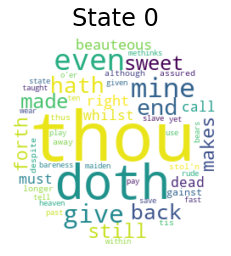

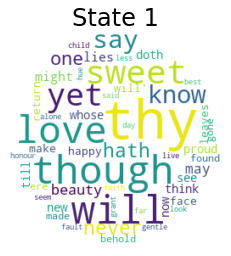

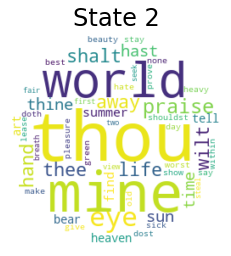

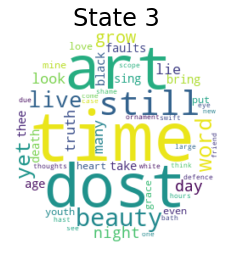

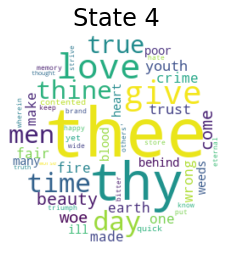

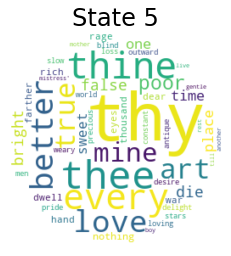

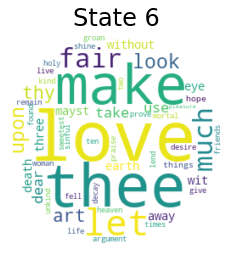

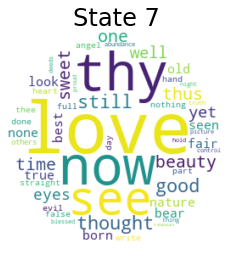

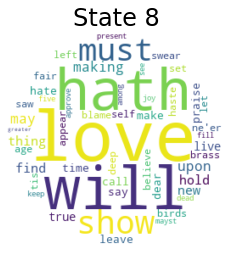

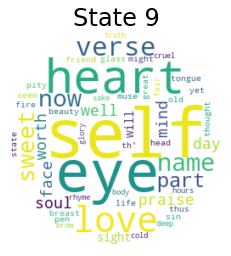

In [8]:
wordclouds = states_to_wordclouds(hmm, word_to_int)

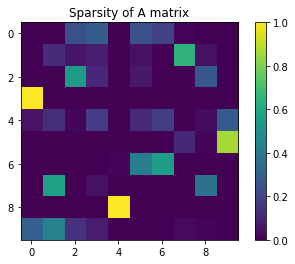

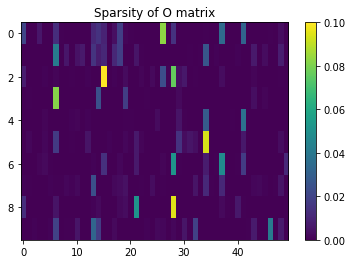

In [9]:
visualize_sparsities(hmm, O_max_cols=50)


Animating...


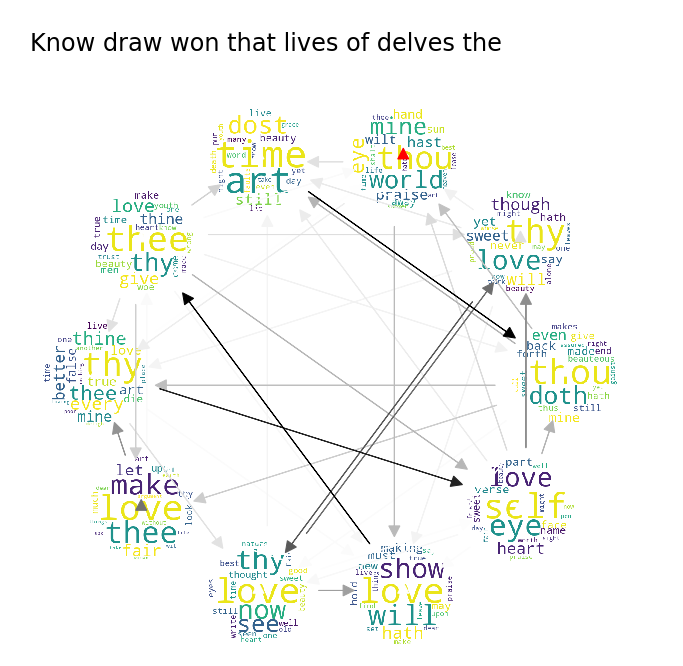

In [12]:
anim = animate_emission(hmm, word_to_int, M=8)
HTML(anim.to_html5_video())